# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.073223
b    0.660887
c   -0.555368
d   -0.150392
e    1.219397
dtype: float64
a         NaN
b    1.321773
c   -1.110737
d   -0.300784
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19 --> it's a counter!
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    11.614569
2023-11-23 10:45:00    10.780213
2023-11-24 10:45:00    10.301545
2023-11-25 10:45:00    12.039243
Freq: D, dtype: float64 

2023-11-22 10:45:00    11.614569
2023-11-23 10:45:00    10.780213
2023-11-24 10:45:00    10.301545
2023-11-25 10:45:00    12.039243
2023-11-26 10:45:00    12.018994
2023-11-27 10:45:00    10.200025
2023-11-28 10:45:00    11.373659
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-0.161727,0.245143,-2.007286,-1.358560
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,-1.396016
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,-0.044160
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,0.984804
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,0.057713
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,-0.988726
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,-2.208181
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,0.776973
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,1.791604
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,-0.970549


or by means of a dictionary:


In [13]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts --> error: all arrays must be the same length

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [14]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,-0.161727,0.245143,-2.007286,-1.358560
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,-1.396016


In [15]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,-2.208181
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,0.776973
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,1.791604
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,-0.970549


In [16]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-0.16172657,  0.24514346, -2.00728587, -1.35855978],
       [ 0.38736313,  1.69828597, -0.07503308, -1.39601595],
       [-1.47433908, -0.7003176 , -0.92215706, -0.04415955],
       [ 0.15761972, -1.26099866, -0.41127255,  0.98480354],
       [ 1.33820075,  1.53351231, -1.41119876,  0.05771338],
       [-0.1866009 ,  1.25500415, -0.7520682 , -0.98872628],
       [-0.09323589, -0.39532494,  1.10585421, -2.20818108],
       [-1.56329823,  2.18714974,  1.00220815,  0.77697312],
       [ 0.67916541, -0.58900191,  1.15847932,  1.79160394],
       [-1.31401815,  2.17111405,  1.47127118, -0.97054933]])

In [19]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.223087,0.614457,-0.084120,-0.335510
std,0.962817,1.298569,1.214483,1.258444
min,-1.563298,-1.260999,-2.007286,-2.208181
25%,-1.032164,-0.540583,-0.879635,-1.266101
50%,-0.127481,0.750074,-0.243153,-0.507354
75%,0.329927,1.657093,1.079943,0.597158
max,1.338201,2.187150,1.471271,1.791604


In [20]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-0.161727,0.387363,-1.474339,0.157620,1.338201,-0.186601,-0.093236,-1.563298,0.679165,-1.314018
B,0.245143,1.698286,-0.700318,-1.260999,1.533512,1.255004,-0.395325,2.187150,-0.589002,2.171114
C,-2.007286,-0.075033,-0.922157,-0.411273,-1.411199,-0.752068,1.105854,1.002208,1.158479,1.471271
D,-1.358560,-1.396016,-0.044160,0.984804,0.057713,-0.988726,-2.208181,0.776973,1.791604,-0.970549


In [21]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,-0.970549
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,1.791604
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,0.776973
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,-2.208181
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,-0.988726
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,0.057713
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,0.984804
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,-0.044160
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,-1.396016
2023-11-22 10:45:00,-0.161727,0.245143,-2.007286,-1.358560


In [22]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 10:45:00,-0.161727,0.245143,-2.007286,-1.358560
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,0.057713
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,-0.044160
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,-0.988726
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,0.984804
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,-1.396016
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,0.776973
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,-2.208181
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,1.791604
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,-0.970549


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [23]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00   -0.161727
2023-11-22 11:45:00    0.387363
2023-11-22 12:45:00   -1.474339
2023-11-22 13:45:00    0.157620
2023-11-22 14:45:00    1.338201
2023-11-22 15:45:00   -0.186601
2023-11-22 16:45:00   -0.093236
2023-11-22 17:45:00   -1.563298
2023-11-22 18:45:00    0.679165
2023-11-22 19:45:00   -1.314018
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -0.161727
2023-11-22 11:45:00    0.387363
2023-11-22 12:45:00   -1.474339
2023-11-22 13:45:00    0.157620
2023-11-22 14:45:00    1.338201
2023-11-22 15:45:00   -0.186601
2023-11-22 16:45:00   -0.093236
2023-11-22 17:45:00   -1.563298
2023-11-22 18:45:00    0.679165
2023-11-22 19:45:00   -1.314018
Freq: H, Name: A, dtype: float64


In [24]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -0.161727  0.245143 -2.007286 -1.358560
2023-11-22 11:45:00  0.387363  1.698286 -0.075033 -1.396016
2023-11-22 12:45:00 -1.474339 -0.700318 -0.922157 -0.044160
                            A         B         C         D
2023-11-22 10:45:00 -0.161727  0.245143 -2.007286 -1.358560
2023-11-22 11:45:00  0.387363  1.698286 -0.075033 -1.396016
2023-11-22 12:45:00 -1.474339 -0.700318 -0.922157 -0.044160


### Selection by label

In [25]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.161727
B    0.245143
C   -2.007286
D   -1.358560
Name: 2023-11-22 10:45:00, dtype: float64

In [26]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-0.161727,0.245143
2023-11-22 11:45:00,0.387363,1.698286
2023-11-22 12:45:00,-1.474339,-0.700318
2023-11-22 13:45:00,0.157620,-1.260999
2023-11-22 14:45:00,1.338201,1.533512
2023-11-22 15:45:00,-0.186601,1.255004
2023-11-22 16:45:00,-0.093236,-0.395325
2023-11-22 17:45:00,-1.563298,2.187150
2023-11-22 18:45:00,0.679165,-0.589002
2023-11-22 19:45:00,-1.314018,2.171114


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,1.338201,1.533512
2023-11-22 15:45:00,-0.186601,1.255004
2023-11-22 16:45:00,-0.093236,-0.395325


In [28]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.3873631314964079
0.3873631314964079


### Selecting by position

In [29]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.157620
B   -1.260999
C   -0.411273
D    0.984804
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00  0.157620 -1.260999
2023-11-22 14:45:00  1.338201  1.533512


In [30]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,0.387363,-0.075033
2023-11-22 12:45:00,-1.474339,-0.922157
2023-11-22 14:45:00,1.338201,-1.411199


In [31]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00  0.387363  1.698286 -0.075033 -1.396016
2023-11-22 12:45:00 -1.474339 -0.700318 -0.922157 -0.044160 

                            B         C
2023-11-22 10:45:00  0.245143 -2.007286
2023-11-22 11:45:00  1.698286 -0.075033
2023-11-22 12:45:00 -0.700318 -0.922157
2023-11-22 13:45:00 -1.260999 -0.411273
2023-11-22 14:45:00  1.533512 -1.411199
2023-11-22 15:45:00  1.255004 -0.752068
2023-11-22 16:45:00 -0.395325  1.105854
2023-11-22 17:45:00  2.187150  1.002208
2023-11-22 18:45:00 -0.589002  1.158479
2023-11-22 19:45:00  2.171114  1.471271


In [32]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


1.6982859719549042

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 10:45:00,-0.161727,0.245143,-2.007286,-1.358560
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,-1.396016
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,0.057713
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,-0.988726
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,0.776973
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,-0.970549


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,NaN,0.245143,NaN,NaN
2023-11-22 11:45:00,0.387363,1.698286,NaN,NaN
2023-11-22 12:45:00,NaN,NaN,NaN,NaN
2023-11-22 13:45:00,0.157620,NaN,NaN,0.984804
2023-11-22 14:45:00,1.338201,1.533512,NaN,0.057713
2023-11-22 15:45:00,NaN,1.255004,NaN,NaN
2023-11-22 16:45:00,NaN,NaN,1.105854,NaN
2023-11-22 17:45:00,NaN,2.187150,1.002208,0.776973
2023-11-22 18:45:00,0.679165,NaN,1.158479,1.791604
2023-11-22 19:45:00,NaN,2.171114,1.471271,NaN


### Setting

Combination of selection and setting of values

Useful to correct possible mistakes

In [37]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [38]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18


In [39]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


In [40]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.245143,-2.007286,-5.0,0.0,0,-1.000000
2023-11-22 11:45:00,-0.387363,-1.698286,-0.075033,-5.0,-0.5,-2,-0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,-5.0,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.157620,-1.260999,-0.411273,-5.0,-1.5,-6,-0.999657
2023-11-22 14:45:00,-1.338201,-1.533512,-1.411199,-5.0,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.186601,-1.255004,-0.752068,-5.0,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,-1.105854,-5.0,-3.0,-12,-0.998630
2023-11-22 17:45:00,-1.563298,-2.187150,-1.002208,-5.0,-3.5,-14,-0.998135
2023-11-22 18:45:00,-0.679165,-0.589002,-1.158479,-5.0,-4.0,-16,-0.997564
2023-11-22 19:45:00,-1.314018,-2.171114,-1.471271,-5.0,-4.5,-18,-0.996917


In [41]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [42]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,0.996917


In [43]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


In [44]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


In [45]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [46]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.245143,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,0.387363,1.698286,NaN,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,NaN,NaN,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.157620,NaN,NaN,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,1.338201,1.533512,NaN,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,1.255004,NaN,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,NaN,1.105854,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,NaN,2.187150,1.002208,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.679165,NaN,1.158479,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,NaN,2.171114,1.471271,5.0,4.5,18.0,0.996917


In [47]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [48]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,False,True,False,True,True,False
2023-11-22 11:45:00,False,False,True,False,False,False,False
2023-11-22 12:45:00,True,True,True,False,False,False,False
2023-11-22 13:45:00,False,True,True,False,False,False,False
2023-11-22 14:45:00,False,False,True,False,False,False,False
2023-11-22 15:45:00,True,False,True,False,False,False,False
2023-11-22 16:45:00,True,True,False,False,False,False,False
2023-11-22 17:45:00,True,False,False,False,False,False,False
2023-11-22 18:45:00,False,True,False,False,False,False,False
2023-11-22 19:45:00,True,False,False,False,False,False,False


In [49]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,0.000000,5.0,0.0,0.0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,0.000000,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.000000,0.000000,0.000000,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.157620,0.000000,0.000000,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,1.338201,1.533512,0.000000,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,1.255004,0.000000,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.000000,0.000000,1.105854,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.000000,2.187150,1.002208,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.679165,0.000000,1.158479,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.000000,2.171114,1.471271,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [50]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,0.245143,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,0.387363,1.698286,NaN,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.387363,1.698286,NaN,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.157620,1.698286,NaN,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,1.338201,1.533512,NaN,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,1.338201,1.255004,NaN,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,1.338201,1.255004,1.105854,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,1.338201,2.187150,1.002208,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.679165,2.187150,1.158479,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.679165,2.171114,1.471271,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [51]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.206914
B          0.614457
C         -0.084120
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.605408
2023-11-22 11:45:00    1.501511
2023-11-22 12:45:00    1.129005
2023-11-22 13:45:00    1.712144
2023-11-22 14:45:00    2.494272
2023-11-22 15:45:00    2.687912
2023-11-22 16:45:00    3.087989
2023-11-22 17:45:00    3.589171
2023-11-22 18:45:00    3.892315
2023-11-22 19:45:00    4.403612
Freq: H, dtype: float64 



In [52]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.943429,-2.082319,10.0,0.5,2,1.999962
2023-11-22 12:45:00,-1.086976,1.243112,-3.004476,15.0,1.5,6,2.999810
2023-11-22 13:45:00,-0.929356,-0.017887,-3.415749,20.0,3.0,12,3.999467
2023-11-22 14:45:00,0.408845,1.515625,-4.826947,25.0,5.0,20,4.998858
2023-11-22 15:45:00,0.222244,2.770630,-5.579016,30.0,7.5,30,5.997906
2023-11-22 16:45:00,0.129008,2.375305,-4.473161,35.0,10.5,42,6.996536
2023-11-22 17:45:00,-1.434290,4.562454,-3.470953,40.0,14.0,56,7.994670
2023-11-22 18:45:00,-0.755125,3.973453,-2.312474,45.0,18.0,72,8.992234
2023-11-22 19:45:00,-2.069143,6.144567,-0.841203,50.0,22.5,90,9.989152


In [53]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.245143,-2.007286,5.0,0.0,0,1.000000
2023-11-22 11:45:00,0.387363,1.698286,-0.075033,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-1.474339,-0.700318,-0.922157,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.157620,-1.260999,-0.411273,5.0,1.5,6,0.999657
2023-11-22 14:45:00,1.338201,1.533512,-1.411199,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.186601,1.255004,-0.752068,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.093236,-0.395325,1.105854,5.0,3.0,12,0.998630
2023-11-22 17:45:00,-1.563298,2.187150,1.002208,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.679165,-0.589002,1.158479,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-1.314018,2.171114,1.471271,5.0,4.5,18,0.996917


In [54]:
df.apply(lambda x: x.max() - x.min())

A           2.901499
B           3.448148
C           3.478557
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [55]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00    0.245143
2023-11-22 11:45:00    2.085649
2023-11-22 12:45:00   -2.174657
2023-11-22 13:45:00   -1.103379
2023-11-22 14:45:00    2.871713
2023-11-22 15:45:00    1.068403
2023-11-22 16:45:00   -0.488561
2023-11-22 17:45:00    0.623852
2023-11-22 18:45:00    0.090164
2023-11-22 19:45:00    0.857096
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [57]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [58]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [59]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [60]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [61]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.123916,0.146206,-0.299663,-0.942017
1,1.223264,1.131260,0.470758,-0.807822
2,1.094141,0.353300,-2.207125,-1.622663
3,0.774223,-0.405786,0.613943,0.065628
4,0.447550,-0.526528,0.553390,-0.872552
5,0.675998,-1.844315,-1.671927,1.920454
6,-0.511631,-2.051152,1.332264,-0.894311
7,0.594617,-0.213396,0.463590,0.938538
8,-0.409614,-0.023637,-0.012139,0.659021
9,-0.276442,1.426931,0.163066,-1.198533


In [62]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.123916  0.146206 -0.299663 -0.942017
 1  1.223264  1.131260  0.470758 -0.807822
 2  1.094141  0.353300 -2.207125 -1.622663,
           0         1         2         3
 3  0.774223 -0.405786  0.613943  0.065628
 4  0.447550 -0.526528  0.553390 -0.872552
 5  0.675998 -1.844315 -1.671927  1.920454
 6 -0.511631 -2.051152  1.332264 -0.894311,
           0         1         2         3
 7  0.594617 -0.213396  0.463590  0.938538
 8 -0.409614 -0.023637 -0.012139  0.659021
 9 -0.276442  1.426931  0.163066 -1.198533]

In [63]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.123916,0.146206,-0.299663,-0.942017
1,1.223264,1.131260,0.470758,-0.807822
2,1.094141,0.353300,-2.207125,-1.622663
3,0.774223,-0.405786,0.613943,0.065628
4,0.447550,-0.526528,0.553390,-0.872552
5,0.675998,-1.844315,-1.671927,1.920454
6,-0.511631,-2.051152,1.332264,-0.894311
7,0.594617,-0.213396,0.463590,0.938538
8,-0.409614,-0.023637,-0.012139,0.659021
9,-0.276442,1.426931,0.163066,-1.198533


In [64]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-1.123916,0.146206,-0.299663,-0.942017
1,1.223264,1.131260,0.470758,-0.807822
2,1.094141,0.353300,-2.207125,-1.622663
3,0.774223,-0.405786,0.613943,0.065628
4,0.447550,-0.526528,0.553390,-0.872552
5,0.675998,-1.844315,-1.671927,1.920454
6,-0.511631,-2.051152,1.332264,-0.894311
7,0.594617,-0.213396,0.463590,0.938538
8,-0.409614,-0.023637,-0.012139,0.659021
9,-0.276442,1.426931,0.163066,-1.198533


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [65]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [66]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.984632,-0.170524
1,bar,one,1.308707,-1.644567
2,foo,two,0.092003,0.088057
3,bar,three,-0.981981,0.434753
4,foo,two,-1.142174,0.366833
5,bar,two,-1.445276,-0.050984
6,foo,one,0.799675,-0.207259
7,foo,three,1.116316,-0.607858


In [68]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-1.118550,-1.260798
foo,onetwotwoonethree,1.850452,-0.530750


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [69]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.625819
       two      -0.283436
baz    one       0.462078
       two       1.058390
foo    one      -1.276732
       two       1.418727
qux    one       1.226772
       two      -2.070832
dtype: float64


In [70]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.308707 -1.644567
    three -0.981981  0.434753
    two   -1.445276 -0.050984
foo one    1.784307 -0.377783
    three  1.116316 -0.607858
    two   -1.050172  0.454890

In [71]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.308707
            D   -1.644567
     three  C   -0.981981
            D    0.434753
     two    C   -1.445276
            D   -0.050984
foo  one    C    1.784307
            D   -0.377783
     three  C    1.116316
            D   -0.607858
     two    C   -1.050172
            D    0.454890
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

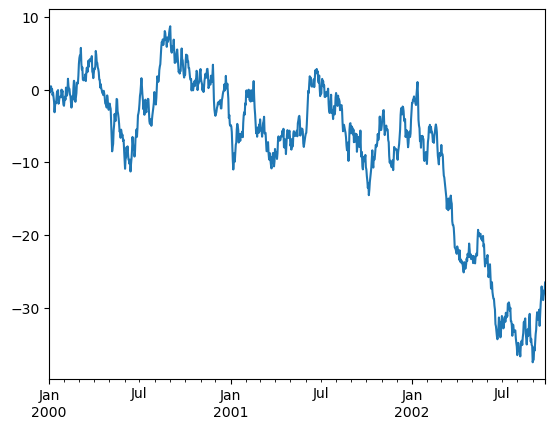

In [72]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

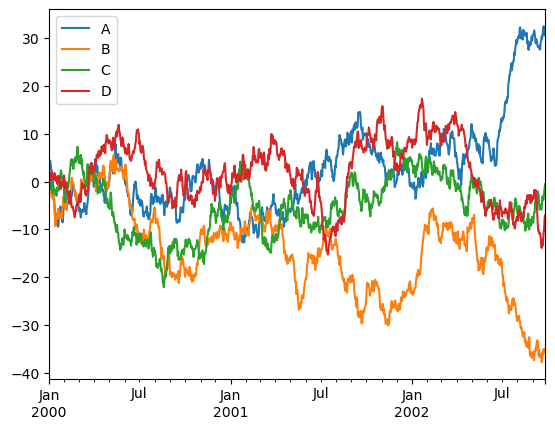

In [73]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')